In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
wine_data = pd.read_csv("./archive/winequality-red.csv")

In [2]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [4]:
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [5]:
wine_data.loc[:,"quality"]=wine_data.quality.map(quality_mapping)

In [6]:
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [7]:
wine_data.shape

(1599, 12)

In [8]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
wine_data_data=wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [10]:
wine_data_target=wine_data[['quality']]

To apply any ML algorithm, we need to split the available dataset into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine_data_data,wine_data_target,random_state=9)

In [12]:
X_train.shape, y_train.shape

((1199, 11), (1199, 1))

In [13]:
X_test.shape,y_test.shape

((400, 11), (400, 1))

In [14]:
from sklearn import tree
from sklearn import metrics

clf=tree.DecisionTreeClassifier(max_depth=3)
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
train_predicitons=clf.predict(X_train)

In [16]:
train_predicitons.shape

(1199,)

In [17]:
metrics.accuracy_score(train_predicitons,y_train)

0.603836530442035

In [18]:
test_predictions=clf.predict(X_test)
metrics.accuracy_score(test_predictions,y_test)

0.545

Not so good on both training and testing sets:

Let's try with various tree depth values and display it!

In [19]:
from sklearn import tree
from sklearn import metrics
training_accuracy=[]
testing_accuracy=[]
for i in range(1,25):
    
    my_tree=tree.DecisionTreeClassifier(max_depth=i)
    my_tree.fit(X_train,y_train)
    train_score=metrics.accuracy_score(my_tree.predict(X_train),y_train)
    test_score=metrics.accuracy_score(my_tree.predict(X_test),y_test)
    training_accuracy.append(train_score)
    testing_accuracy.append(test_score)



In [20]:
training_accuracy

[0.5571309424520434,
 0.5571309424520434,
 0.603836530442035,
 0.6330275229357798,
 0.6688907422852377,
 0.7172643869891576,
 0.7648040033361134,
 0.8123436196830692,
 0.8423686405337781,
 0.8715596330275229,
 0.914095079232694,
 0.9424520433694745,
 0.969140950792327,
 0.9841534612176814,
 0.9949958298582152,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [21]:
testing_accuracy

[0.57,
 0.57,
 0.545,
 0.59,
 0.5975,
 0.59,
 0.6325,
 0.6125,
 0.6225,
 0.6325,
 0.6075,
 0.625,
 0.62,
 0.63,
 0.625,
 0.61,
 0.625,
 0.595,
 0.6425,
 0.6275,
 0.6125,
 0.61,
 0.6075,
 0.61]

In [22]:
import seaborn
import matplotlib.pyplot as plt


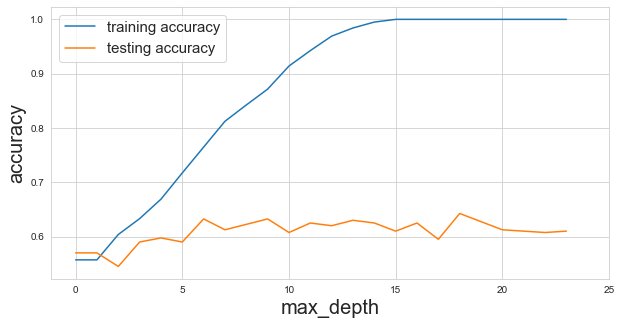

In [23]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(training_accuracy,label="training accuracy")
plt.plot(testing_accuracy,label="testing accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We can see that the model with depth starting at 14 has higher accuracy of 1 which is from then onwards, it's overfitted which is not a generic model and can't give better results on different testing set. 


For testing set, the good accuracy is obtained at around 11